<a href="https://colab.research.google.com/github/DAVOR2003/ADA/blob/main/Untitled13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Descripcion del problema

El objetivo principal de este problema es poder encontrar el camino mas corto entre un nodo inicial y todos los nodos del grafo $G=(V,E)$.
Esto quiere decir que se busca la distancia mas corta entre el nodo inicial y el nodo buscado.

**Entrada**: Un grafo dirigido $G=(V,E)$, un vértice fuente $s\in V$, y un valor real $l_e \geq 0$ asociado a cada arco $e\in E$.

**Salida**: La distancia más corta $dist(s,v)$ para cada vértice $v\in 

#Ciclos negativo

Hay veces que queremos representar problemas como la compra o venta dentro de unas transacciones financieras. Este problema corresponde de encontrar el camino más corto de un grafo con longitudes positivas y negativas, pero con arcos negativos tendremos que tener cuidado con lo que queremos decir con “distancia de ruta más corta”,Puede ocurir que en busca de este camino nos encontremos que el grafo contenga un ciclo negativo, es decir, un ciclo dirigido en el que la suma de sus arcos es negativo, entonces si llegase a suceder esto debemos hacer buscar otro camino ya que este camino no debe ser un ciclo negativo o si no existe ningun otro camino simplemente no existe camino mas corto posible.

![image](https://imgur.com/0Drov9v.png)

## 2. Descripción del algoritmo

#(Bellman-Ford)

El algoritmo de Bellman-Ford resuelve el problema del camino más corto de fuente única con grafos que contienen arcos negativos, calculando las distancias correctas del camino más corto o determina correctamente que el grafo de entrada contiene un ciclo negativo. Este algoritmo sigue el paradigma de la programación dinámica.

Comienza con un vértice inicial y calcula las distancias entre otros vértices que puede alcanzar una sola arista. A continuación, busca un camino con dos aristas, y así sucesivamente. El algoritmo de Bellman-Ford utiliza el enfoque ascendente.

Basado en el "Principio de Relajación", los valores más precisos recuperan gradualmente una aproximación a la distancia adecuada hasta alcanzar finalmente la solución óptima.

Las aristas de peso negativo pueden generar ciclos de peso negativo, que reducen la distancia total del camino al volver al mismo punto.


Definimos la siguiente Subestructura optima para la aplicacion del algoritmo.


#(Dijkstra)

La entrada consiste en un grafo dirigido $G$ con $n$ vértices, donde cada arco posee un peso asignado **no negativo**, más un nodo $s$ que corresponde al punto de partida. El algoritmo retorna una lista con la distancia mínima que existe entre el nodo inicial y el resto de nodos del grafo. Los pasos realizados son los siguientes:

1. Se crea una lista para guardar la distancia mínima de $s$ al resto de nodos, inicializando sus valores en infinito.

2. Asignamos al nodo $s$ una distancia de 0, puesto que corresponde al nodo inicial.

3. Insertamos los nodos del grafo en una cola de prioridad, donde se ordenarán por su distancia.

4. Mientras la cola no esté vacía, se obtiene el nodo $u$ con menor distancia, eliminándolo de la cola y marcándolo como visitado. Si el nodo ya fue visitado, se elimina y se continua con el siguiente. 

5. Se calcula la distancia a cada nodo adyacente $v$ no visitado, con la fórmula $\text{dist}(s, v) = \text{dist}(s, u) + w(u, v)$, donde $w(u, v)$ corresponde al peso del arco $(u, v)$.

6. Si la distancia calculada en el paso anterior es menor a la actual, actualizamos su valor y volvemos a insertar el nodo en la cola.

7. Al finalizar las iteraciones, retornamos la lista con las distancias obtenidas.

### **Subestructura óptima**

El algoritmo de Bellman-Ford define $P$ como el camino más corto entre $s$→$v$ que se puede dividir entre el camino más corto $P'$ entre $s$→$w$ ($w$ un nodo que conecta con $v$) más el camino entre $w$→$v$.

![image](https://imgur.com/QQXhJ7Q.png)

**Funcionamiento**:

El algoritmo calcula las rutas más cortas de forma ascendente. 
 

1.   Primero calcula las distancias más cortas que tienen como máximo un borde en el camino. 
2.   Luego, calcula los caminos más cortos con 2 aristas como máximo, y así sucesivamente.
3. Después de la i-ésima iteración del bucle exterior, se calculan los caminos más cortos con como máximo i aristas.Puede haber un máximo de |V| – 1 aristas en cualquier camino simple, por eso el ciclo externo ejecuta |v| - 1 vez.

La idea es, asumiendo que no hay un ciclo de peso negativo si hemos calculado las rutas más cortas con como máximo aristas i, entonces una iteración sobre todas las aristas garantiza dar la ruta más corta con aristas como máximo (i+1)

#2.2 Código

In [2]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

class Nodo:
    def __init__(self, idx, grafo):
        self.idx = idx
        self.arcos = list(filter(lambda x: x[0] == idx, grafo))
        self.valor = float("inf")
        self.visitado = False

def inicializarGrafo(grafo): # recibe grafo del generador de instancias, retorna mapa de objetos Nodo
    nodos = {}
    for arco in grafo:
        if arco[0] not in nodos:
            nodos[arco[0]] = Nodo(arco[0], grafo)
        if arco[1] not in nodos:
            nodos[arco[1]] = Nodo(arco[1], grafo)
    return nodos


    pos = graphviz_layout(graph)
    nx.draw_networkx(graph, pos, node_size=900, verticalalignment="bottom")

    labels = nx.get_edge_attributes(graph,'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)

    distLabels = nx.get_node_attributes(graph, "valor")
    nx.draw_networkx_labels(graph, pos, distLabels, verticalalignment="top", font_color = "yellow")

In [14]:
def bellmanFord(grafo, nodoInicial, visualize = False, verbose = False):
    if verbose: print("inicializando grafo")

    grafo = inicializarGrafo(grafo)
    grafo[nodoInicial].valor = 0

    for numIter in range(len(grafo) - 1):
        for nodo in grafo.values():
            for arco in nodo.arcos:
                if nodo.valor == float("inf"): break
                dist = nodo.valor + arco[2]
                if dist < grafo[arco[1]].valor:
                    grafo[arco[1]].valor = dist
    

    # revisa si hay ciclos negativos
    for nodo in grafo.values():
        for arco in nodo.arcos:
            if nodo.valor == float("inf"): break
            dist = nodo.valor + arco[2]
            if dist < grafo[arco[1]].valor:
                print("El grafo contiene un ciclo negativo")
                return None

    if verbose:
        print("el grafo no contiene ciclos negativos")
        print(); print("resultado")
        for nodo in grafo.values():
            print(f"idx = {nodo.idx}, valor = {nodo.valor}")

    return grafo

In [16]:
def dijkstra(arcos, nodoInicial, visualize = False, verbose = False):
    grafo = inicializarGrafo(arcos)
    grafo[nodoInicial].valor = 0
    grafo[nodoInicial].visitado = True

    nodo = grafo[nodoInicial]
    auxArcos = nodo.arcos.copy()

    while (auxArcos):
        arcoMin = min(auxArcos, key = lambda t: t[2])
        auxArcos.remove(arcoMin)

        nodo = grafo[arcoMin[1]]
        if nodo.visitado: 
            continue
        nodo.visitado = True
      
        distancia = arcoMin[2]
        nodo.valor = distancia
        
        for arco in nodo.arcos:
            auxArcos.append((arco[0], arco[1], arco[2] + distancia)) # agrega cada arco a la lista auxiliar, considerando la distancia
        if verbose: print("\n")
    return grafo

In [21]:

import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(0, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(0, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

#3-Correctitud

###Teorema
_Bellman-Ford encuentra correctamente la ruta más corta $P(n)$ desde $s$ hasta todos los nodos del grafo $G$, donde $n$ es la cantidad de nodos, mientras no exista ningún ciclo negativo. Si existe, entonces se advertirá de su presencia._

###Caso Base $P(1)$
El único camino que se debe encontrar es $s ↝ s$, y la distancia menor entcontrada es $0$.

###Paso Inductivo $P(k+1)$
Asumamos que la hipótesis planteda anteriormente es correcta, y funciona también para la iteración $i+1$. Para el camino $s ↝ v$, se toma un nodo intermedio $w$, y existe un camino más corto $s ↝ w$, $dist(w,i)$ y sabemos que es la ruta más corta $s↝w$.  
En la iteración $i+1$, se cumple $dist[v,i+1] \leq dist[u,i]+w[u,v]$ por el reajuste del algoritmo. Concluimos que $dist[v,i+1]$ es la ruta más corta encontrada por el algoritmo usando $i+1$ arcos.


#4-Tiempo de ejecución


### Mejor Caso
Si la relajación de las aristas se produce de izquierda a derecha en el gráfico anterior, el algoritmo sólo tendría que realizar una iteración de relajación para encontrar el camino más corto, lo que resulta en una complejidad temporal de **O(E)** correspondiente al número de aristas del gráfico.
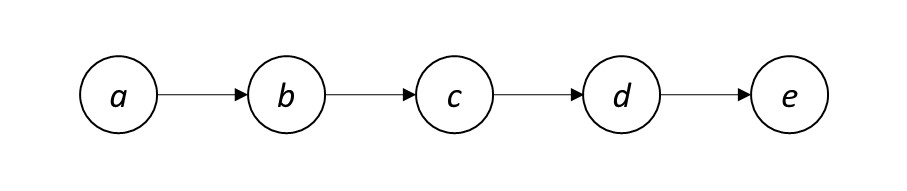
### Caso Promedio

Puede reducir el tiempo de ejecución en el peor de los casos deteniendo el algoritmo cuando no se realicen cambios en los valores de la ruta. Como resultado, habrá menos iteraciones.

Otra forma de mejorarlo es ignorar cualquier vértice V con un valor de distancia que no haya cambiado desde la última relajación en iteraciones posteriores, reduciendo el número de aristas que necesitan ser relajadas y aumentando el número de aristas con valores correctos después de cada iteración. Hay más información disponible en el enlace que aparece al final de este post.

La relajación se produce |V| - 1 vez por cada |E| el número de aristas, por lo que se multiplican los dos y se obtiene la media, que es la complejidad temporal cuadrática de 

**O(E V)**



### Peor Caso

Cuando se encuentra un ciclo negativo en el gráfico, se puede tener el peor escenario posible.

En un grafo completo con aristas entre cada par de vértices, y suponiendo que se ha encontrado el camino más corto en las primeras iteraciones o repeticiones pero que se sigue con la relajación de aristas, se tendría que relajar |E| * (|E| - 1) / 2 aristas, (|V| - 1) número de veces.

En el peor de los casos, en el caso de un grafo completo, la complejidad temporal es la siguiente

**O(|V|2) = O(E V) * O(|V|) = O (V3)**
<br>
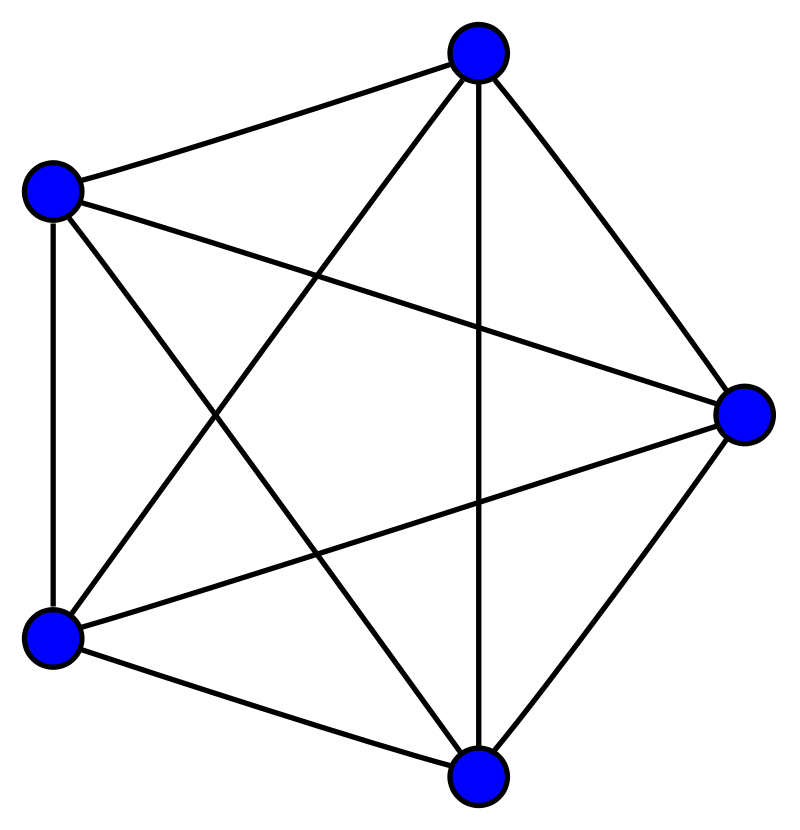
<br>

#5-Experimentos

**Comparación entre Bellman-Ford y Dijkstra**

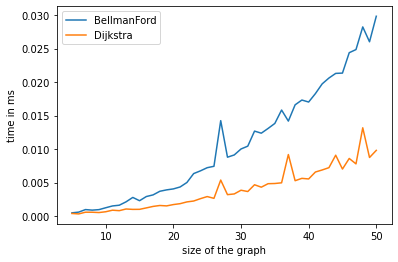

In [23]:
#@title Código gráfico
import matplotlib.pyplot as plt
import random
from timeit import repeat
x=[]; y=[]; y1=[]

for n in range(5,51):

  grafo,src = instance_generator(n)

  #la función repeat está ejecutando 10 veces al algoritmo bellmanFord y retorna el mejor tiempo obtenido para cada ejecucion.
  t = repeat(setup="from __main__ import bellmanFord", stmt=f"bellmanFord({grafo},{src})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  #la función repeat está ejecutando 10 veces al algoritmo Dijkstra y retorna el mejor tiempo obtenido para cada ejecucion.
  t = repeat(setup="from __main__ import dijkstra", stmt=f"dijkstra({grafo},{src})", repeat=1, number=10)

  y1.append(t)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["BellmanFord","Dijkstra"])

plt.xlabel('size of the graph')
plt.ylabel('time in ms')
plt.show()

## Análisis
Se puede observar que el tiempo de ejecución del algoritmo Bellman-Ford crece mucho más rápido para tamaños de entrada mayores. Esto se podría debe a que el peor caso de Bellman-Ford es $O(V^3)$ mientras que para Dijkstra es sólo $O(V^2)$.